# Кацуба Кирилл, БПМ213
## Вариант 13

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Задание 3.1.13

In [3]:
# Инициализируем матрицу A и вектор свободных членов b
n = 5
N = 13
b = np.full((5, ), N, dtype=float)
A = np.zeros((n, n))
print('Матрица A: ')
for i in range(n):
    for j in range(n):
        A[i, j] = 1 / ((1 + 0.1 * N * (i + 1) * (j + 1)) ** 3)
        print(A[i, j], end=' ')
    print()

print('\nВектор b: ')
for i in range(n):
    print(b[i])

Матрица A: 
0.08218952905399854 0.02143347050754458 0.008499859752314085 0.004195898090027189 0.0023703703703703703 
0.02143347050754458 0.004195898090027189 0.0014674117205108936 0.0006749715162020163 0.00036443148688046647 
0.008499859752314085 0.0014674117205108936 0.0004881899527578581 0.00021861287507410972 0.00011607492636496858 
0.004195898090027189 0.0006749715162020163 0.00021861287507410972 9.652293500763301e-05 5.080526342529086e-05 
0.0023703703703703703 0.00036443148688046647 0.00011607492636496858 5.080526342529086e-05 2.659901650136486e-05 

Вектор b: 
13.0
13.0
13.0
13.0
13.0


In [4]:
# Функция приведения матрицы A к верхнетреугольному виду (Метод Гаусса)
def method_gauss(A: np.ndarray, b: np.ndarray):
    n = A.shape[0]
    for i in range(n):
        for j in range(i + 1, n):
            b[j] -= (b[i] * (A[j, i] / A[i, i]))
            A[j] -= (A[i] * (A[j, i] / A[i, i]))
    return [A, b]

In [5]:
# Решение системы с помощью метода Гаусса
def solve_method_gauss(A: np.ndarray, b: np.ndarray):
    A_n, b_n = method_gauss(A.copy(), b.copy())
    n = A.shape[0]
    x = np.ones((5,))
    x[-1] = b_n[-1] / A_n[-1, -1]
    for i in range(n - 2, -1, -1):
        x[i] = (b_n[i] - x[i + 1:].dot(A_n[i, i + 1:])) / A_n[i, i]
    return x

In [6]:
# Проверка результатов
# Умножи матрицу A на решение x и получим вектор b
x_accurate = solve_method_gauss(A.copy(), b.copy())
b_ = A.dot(x_accurate)
print(f'Решение полученное с помощью метода Гаусса: {x_accurate}\n')
print(f'Результат умножения матрицы A на точное решение x: {b_}\n')
print('Как видим найденное решение точное')

Решение полученное с помощью метода Гаусса: [ 3.22690979e+06 -3.28792209e+08  3.96447513e+09 -1.23505436e+10
  1.05072578e+10]

Результат умножения матрицы A на точное решение x: [13. 13. 13. 13. 13.]

Как видим найденное решение точное


In [7]:
# число обусловленности матрицы A для различных норм
print('Число обусловленности матрицы А:\n')
print(f'Норма L1 : {np.linalg.cond(A, p=1)}')
print(f'Норма L_inf : {np.linalg.cond(A, p=np.inf)}')
print(f'Норма L2: {np.linalg.cond(A)}')

Число обусловленности матрицы А:

Норма L1 : 1666380186.508626
Норма L_inf : 1666380186.5086644
Норма L2: 1040230098.3492539


In [8]:
delta = 1.1 # погрешность в 10%
d = np.empty((n,))
res = []
for i in range(n):
    b_i = b.copy()
    b_i[i] *= delta
    x_error = solve_method_gauss(A.copy(), b_i)
    res.append(x_error)
    d_i = (np.max(abs(x_error - x_accurate))) / (np.max(abs(x_accurate)))
    d[i] = d_i

Как можно заметить наибольшее влияние на погрешность решения вносит четвертая компонента вектора b.


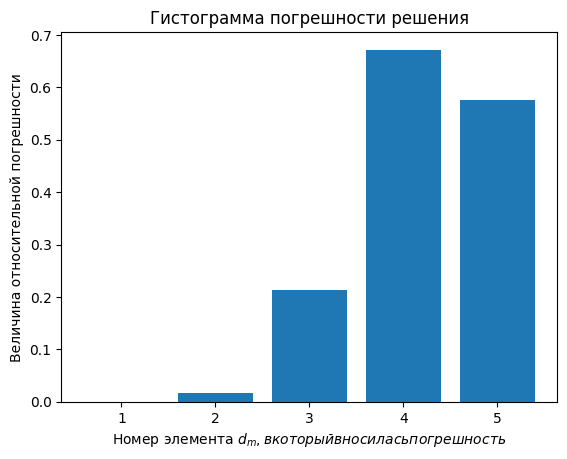

In [9]:
plt.bar(['1', '2', '3', '4', '5'], d)
plt.xlabel('Номер элемента $d_{m}, в который вносилась погрешность$')
plt.ylabel('Величина относительной погрешности')
plt.title('Гистограмма погрешности решения')
plt.savefig('/Users/kirill/edu/3course/Numerical_methods/laba_2/materials/hist_error.png')
print('Как можно заметить наибольшее влияние на погрешность решения вносит четвертая компонента вектора b.')

In [10]:
res = np.array(res)

In [11]:
# Оцениваем погрешность
b_ = b.copy()
b_[3] *= delta
print(f'm = {4}')
print(f'cond(A) = {np.linalg.cond(A, p=np.inf)}')
print(f'delta(b_m) = {(np.max(abs(x_error - x_accurate))) / (np.max(abs(x_accurate)))}')
print(f'delta(x^m) <= {np.linalg.cond(A, p=np.inf) * (np.max(abs(x_error - x_accurate))) / (np.max(abs(x_accurate)))}')
print(f'd_m = {d[3]}')

m = 4
cond(A) = 1666380186.5086644
delta(b_m) = 0.5759044601165239
delta(x^m) <= 959675781.6601447
d_m = 0.6717040222845146


### Задача 3.5.4

In [12]:
def cholesky(A: np.ndarray):
    n = A.shape[0]
    L = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            tmp_sum = 0
            if i == j:
                for p in range(j):
                    tmp_sum += L[j, p] * L[j, p]
                L[i, j] = np.sqrt(A[i, j] - tmp_sum)
            else:
                for p in range(j):
                    tmp_sum += L[i, p] * L[j, p]
                if L[j, j] == 0:
                    L[i, j] = 0
                else:
                    L[i, j] = (A[i, j] - tmp_sum) / L[j, j]
    return L

In [13]:
# инициализация матрицы A и вектора b
A_cholesky = np.zeros((50, 50))
b_cholesky = np.zeros((50, ))
for i in range(50):
    for j in range(50):
        if i == j:
            A_cholesky[i, j] = 275 + ((j + 1) / 15) + ((i + 1) / 50)
        else:
            A_cholesky[i, j] = (i + j + 2) / 65
    b_cholesky[i] = 750 - ((i + 1) ** 3)

In [14]:
# Нахождение нижнетреуголной матрицы
L = cholesky(A_cholesky)
LT = L.T
if np.allclose(L.dot(LT), A_cholesky):
    print('Матрица L найдена верно: A = L * L^T')

Матрица L найдена верно: A = L * L^T


In [15]:
# Решаем L * y = b
n = L.shape[0]
y = np.ones((50,))
y[0] = b_cholesky[0] / L[0, 0]
for i in range(1, n):
    y[i] = (b_cholesky[i] - y[0:i].dot(L[i, :i])) / L[i, i]
print('Решение L * y = b:')
print(y)

Решение L * y = b:
[ 4.51592840e+01  4.47226140e+01  4.35553501e+01  4.12966656e+01
  3.75864288e+01  3.20653805e+01  2.43753101e+01  1.41592289e+01
  1.06153974e+00 -1.52717960e+01 -3.51930960e+01 -5.90527986e+01
 -8.71993093e+01 -1.19978852e+02 -1.57735326e+02 -2.00810170e+02
 -2.49542226e+02 -3.04267620e+02 -3.65319641e+02 -4.33028629e+02
 -5.07721869e+02 -5.89723496e+02 -6.79354403e+02 -7.76932156e+02
 -8.82770923e+02 -9.97181402e+02 -1.12047076e+03 -1.25294259e+03
 -1.39489684e+03 -1.54662981e+03 -1.70843410e+03 -1.88059859e+03
 -2.06340842e+03 -2.25714499e+03 -2.46208596e+03 -2.67850525e+03
 -2.90667306e+03 -3.14685586e+03 -3.39931646e+03 -3.66431401e+03
 -3.94210403e+03 -4.23293850e+03 -4.53706586e+03 -4.85473106e+03
 -5.18617566e+03 -5.53163787e+03 -5.89135260e+03 -6.26555156e+03
 -6.65446332e+03 -7.05831340e+03]


In [16]:
# Решаем L^T * x = y
n = LT.shape[0]
x_cholesky = np.ones((n,))
x_cholesky[-1] = y[-1] / LT[-1, -1]
for i in range(n - 2, -1, -1):
    x_cholesky[i] = (y[i] - x_cholesky[i + 1:].dot(LT[i, i + 1:])) / LT[i, i]
print('Решение L^T * x = y:')
print(x_cholesky)

Решение L^T * x = y:
[  14.57969615   14.82028702   15.01717037   15.14857238   15.19273691
   15.12792548   14.93241727   14.58450908   14.06251533   13.34476806
   12.40961683   11.23542883    9.80058873    8.08349877    6.06257866
    3.71626564    1.02301438   -2.03870297   -5.49039683   -9.3535602
  -13.64966869  -18.40018052  -23.62653654  -29.35016025  -35.59245784
  -42.37481816  -49.71861278  -57.64519599  -66.17590483  -75.33205907
  -85.13496127  -95.6058968  -106.7661338  -118.63692327 -131.23949904
 -144.59507781 -158.72485913 -173.65002549 -189.39174226 -205.97115775
 -223.40940323 -241.7275929  -260.94682397 -281.08817666 -302.17271417
 -324.22148276 -347.25551174 -371.29581346 -396.36338339 -422.47920008]


In [19]:
# Проверка решения
if np.allclose(np.linalg.solve(A_cholesky, b_cholesky), x_cholesky) and np.allclose(b_cholesky, A_cholesky.dot(x_cholesky)):
    print('Метод Холецкого решил задачу верно.')
A_cholesky.dot(x_cholesky)

Метод Холецкого решил задачу верно.


array([ 7.49000e+02,  7.42000e+02,  7.23000e+02,  6.86000e+02,
        6.25000e+02,  5.34000e+02,  4.07000e+02,  2.38000e+02,
        2.10000e+01, -2.50000e+02, -5.81000e+02, -9.78000e+02,
       -1.44700e+03, -1.99400e+03, -2.62500e+03, -3.34600e+03,
       -4.16300e+03, -5.08200e+03, -6.10900e+03, -7.25000e+03,
       -8.51100e+03, -9.89800e+03, -1.14170e+04, -1.30740e+04,
       -1.48750e+04, -1.68260e+04, -1.89330e+04, -2.12020e+04,
       -2.36390e+04, -2.62500e+04, -2.90410e+04, -3.20180e+04,
       -3.51870e+04, -3.85540e+04, -4.21250e+04, -4.59060e+04,
       -4.99030e+04, -5.41220e+04, -5.85690e+04, -6.32500e+04,
       -6.81710e+04, -7.33380e+04, -7.87570e+04, -8.44340e+04,
       -9.03750e+04, -9.65860e+04, -1.03073e+05, -1.09842e+05,
       -1.16899e+05, -1.24250e+05])

### Задача 3.8.3

In [118]:
# Функция приведения матрицы A к верхнетреугольному виду (Метод Гаусса), 
# схема полного выбора
def method_gauss_functional(A: np.ndarray, b: np.ndarray):
    n = A.shape[0]
    for i in range(n):
        index = np.argmax(abs(A[i:, i]))
        if index != 0:
            A[i], A[i + index] =  np.copy(A[i + index]), np.copy(A[i])
            b[i], b[i + index] =  np.copy(b[i + index]), np.copy(b[i])
        for j in range(i + 1, n):
            b[j] -= (b[i] * (A[j, i] / A[i, i]))
            A[j] -= (A[i] * (A[j, i] / A[i, i]))
    return [A, b]

# Решение системы с помощью метода Гаусса для функциональных уравнений
def backward_gauss_functional(A: np.ndarray, b: np.ndarray):
    A_n, b_n = method_gauss_functional(A.copy(), b.copy())
    n = A.shape[0]
    for i in range(n - 1, 0, -1):
        for j in range(i - 1, -1, -1):
            b_n[j] -= (b_n[i] * (A_n[j, i] / A_n[i, i]))
            A_n[j, i] -= A_n[i, i] * (A_n[j, i] / A_n[i, i])
    x = []
    for i in range(n):
        x.append(b_n[i] / A_n[i, i])
    return np.array(x)

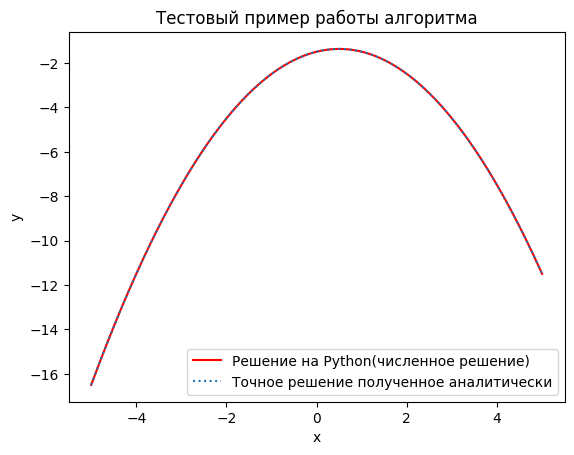

In [128]:
def f_solution(x):
    return 0.5 * (-x**2 + x - 3)

def f_example_1(x):
    return x**2 + 5

def f_example_2(x):
    return x + 2

abscissa_points = np.linspace(-5, 5, 1000)
b_example = np.array([[f_example_1(item) for item in abscissa_points],\
                  [f_example_2(item) for item in np.linspace(-5, 5, 1000)]])
A_example = np.array([[1., 2.], [3., 4.]])

y_example = backward_gauss_functional(A_example.copy(), b_example.copy())

res = sum(y_ex[i] for i in range(2))
plt.plot(abscissa_points, res, 'r', label='Решение на Python(численное решение)')
plt.plot(abscissa_points, f_solution(abscissa_points), ls = ':', label='Точное решение полученное аналитически')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Тестовый пример работы алгоритма')
plt.legend()
plt.savefig('/Users/kirill/edu/3course/Numerical_methods/laba_2/materials/test_example.png')

In [131]:
def func(x, i):
    return x * np.exp(x / (i + 1)) * np.cos(x / (i + 1))
qm = 1.001 - (2 * 3 * 1e-3)
abscissa_points = np.linspace(-5, 5, 1000)
b_last = np.array([[func(item, i) for item in abscissa_points] for i in range(30)])
A_last = np.zeros((30, 30))
for i in range(30):
    for j in range(30):
        if i == j:
            A_last[i, j] = (qm - 1) ** (i + j + 2)
        else:
            A_last[i, j] = (qm ** (i + j + 2)) + 0.1 * (j - i)

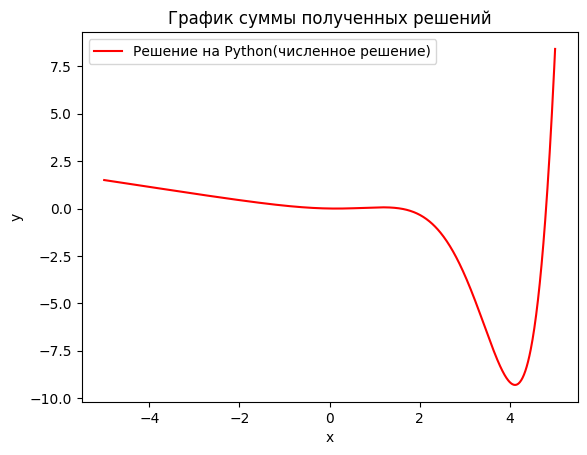

In [132]:
y = backward_gauss_functional(A_last.copy(), b_last.copy())
z = sum(y[i] for i in range(30))
plt.plot(abscissa_points, z, 'r', label='Решение на Python(численное решение)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('График суммы полученных решений')
plt.legend()
plt.savefig('/Users/kirill/edu/3course/Numerical_methods/laba_2/materials/func_equation.png')